In [1]:
import spacy

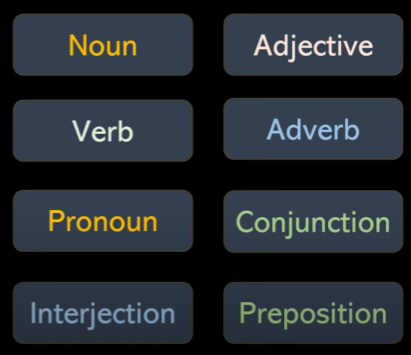

These 8 are basics there are more

<h3>POS tags</h3>

In [3]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Elon flew to mars yesterday. He carried biryani masala with him")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_))

Elon  |  PROPN  |  proper noun
flew  |  VERB  |  verb
to  |  ADP  |  adposition
mars  |  NOUN  |  noun
yesterday  |  NOUN  |  noun
.  |  PUNCT  |  punctuation
He  |  PRON  |  pronoun
carried  |  VERB  |  verb
biryani  |  ADJ  |  adjective
masala  |  NOUN  |  noun
with  |  ADP  |  adposition
him  |  PRON  |  pronoun


You can check https://v2.spacy.io/api/annotation for the complete list of pos categories in spacy. 

https://en.wikipedia.org/wiki/Preposition_and_postposition

https://en.wikipedia.org/wiki/Part_of_speech

In [6]:
doc = nlp("Wow! Dr. Strange made 265 million $ on the very first day")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_))

Wow  |  INTJ  |  interjection
!  |  PUNCT  |  punctuation
Dr.  |  PROPN  |  proper noun
Strange  |  PROPN  |  proper noun
made  |  VERB  |  verb
265  |  NUM  |  numeral
million  |  NUM  |  numeral
$  |  NUM  |  numeral
on  |  ADP  |  adposition
the  |  DET  |  determiner
very  |  ADV  |  adverb
first  |  ADJ  |  adjective
day  |  NOUN  |  noun


<h3>Tags</h3>

In [10]:
doc = nlp("Wow! Dr. Strange made 265 million $ on the very first day")

for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))
    
    # Tags give us name of tenses also.

Wow  |  INTJ  |  interjection  |  UH  |  interjection
!  |  PUNCT  |  punctuation  |  .  |  punctuation mark, sentence closer
Dr.  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
Strange  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
made  |  VERB  |  verb  |  VBD  |  verb, past tense
265  |  NUM  |  numeral  |  CD  |  cardinal number
million  |  NUM  |  numeral  |  CD  |  cardinal number
$  |  NUM  |  numeral  |  CD  |  cardinal number
on  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
the  |  DET  |  determiner  |  DT  |  determiner
very  |  ADV  |  adverb  |  RB  |  adverb
first  |  ADJ  |  adjective  |  JJ  |  adjective (English), other noun-modifier (Chinese)
day  |  NOUN  |  noun  |  NN  |  noun, singular or mass


<h3>In below sentences Spacy figures out the past vs present tense for quit </h3>

In [34]:
doc = nlp("He quits the job")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_)) # Gives correct present tense.

quits | VBZ | verb, 3rd person singular present


In [35]:
doc = nlp("he quit the job")

print(doc[1].text, "|", doc[1].tag_, "|", spacy.explain(doc[1].tag_)) # Gives correct past tense

quit | VBD | verb, past tense


<h3>Removing all SPACE, PUNCT and X token from text</h3>

Processing microsoft's earning report: https://www.microsoft.com/en-us/investor/earnings/fy-2022-q2/press-release-webcast

In [10]:
earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""



In [12]:
doc = nlp(earnings_text)

In [14]:
for token in doc:
    print(token," | ", token.pos_, " | ", spacy.explain(token.pos_))

Microsoft  |  PROPN  |  proper noun
Corp.  |  PROPN  |  proper noun
today  |  NOUN  |  noun
announced  |  VERB  |  verb
the  |  DET  |  determiner
following  |  VERB  |  verb
results  |  NOUN  |  noun
for  |  ADP  |  adposition
the  |  DET  |  determiner
quarter  |  NOUN  |  noun
ended  |  VERB  |  verb
December  |  PROPN  |  proper noun
31  |  NUM  |  numeral
,  |  PUNCT  |  punctuation
2021  |  NUM  |  numeral
,  |  PUNCT  |  punctuation
as  |  SCONJ  |  subordinating conjunction
compared  |  VERB  |  verb
to  |  ADP  |  adposition
the  |  DET  |  determiner
corresponding  |  ADJ  |  adjective
period  |  NOUN  |  noun
of  |  ADP  |  adposition
last  |  ADJ  |  adjective
fiscal  |  ADJ  |  adjective
year  |  NOUN  |  noun
:  |  PUNCT  |  punctuation


  |  SPACE  |  space
·  |  PUNCT  |  punctuation
          |  SPACE  |  space
Revenue  |  NOUN  |  noun
was  |  AUX  |  auxiliary
$  |  SYM  |  symbol
51.7  |  NUM  |  numeral
billion  |  NUM  |  numeral
and  |  CCONJ  |  coordinating co

In [16]:
filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "PUNCT", "X"]:
        filtered_tokens.append(token)

In [18]:
filtered_tokens[:10]

[Microsoft,
 Corp.,
 today,
 announced,
 the,
 following,
 results,
 for,
 the,
 quarter]

In [20]:
count = doc.count_by(spacy.attrs.POS) # For attrs and POS in the attribute.
count

{96: 13,
 92: 46,
 100: 24,
 90: 9,
 85: 16,
 93: 16,
 97: 27,
 98: 1,
 84: 20,
 103: 10,
 87: 6,
 99: 5,
 89: 12,
 86: 3,
 94: 3,
 95: 2}

In [22]:
doc.vocab[96].text

'PROPN'

In [24]:
for k,v in count.items():
    print(doc.vocab[k].text, "|",v)

PROPN | 13
NOUN | 46
VERB | 24
DET | 9
ADP | 16
NUM | 16
PUNCT | 27
SCONJ | 1
ADJ | 20
SPACE | 10
AUX | 6
SYM | 5
CCONJ | 12
ADV | 3
PART | 3
PRON | 2
